In [1]:
# This notebook reads in the data from AMPLIFY scores on PG and stores the correlation values
# In the future, it would be good to introduce other metrics other than Spearman

In [1]:
import pandas as pd
import numpy as np
import boto3
import os
from io import StringIO
from scipy.stats import spearmanr
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
# Define S3 path
pgfolder = "s3://research-model-checkpoints/DMS_ProteinGym_substitutions/"

# Initialize S3 client
s3 = boto3.client("s3")

# Extract bucket name and prefix (folder path in S3)
bucket_name = "research-model-checkpoints"
prefix = "DMS_ProteinGym_substitutions/"

# List all CSV files in the S3 bucket
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
file_keys = [obj["Key"] for obj in response.get("Contents", []) if obj["Key"].endswith(".csv")]

# Filter processed files (ending with "_with_scoresandembeddings_allyears.csv")
processed_files = [key for key in file_keys if key.endswith("_with_scoresandembeddings_allyears.csv")]
num_files = len(processed_files)
print(f"Total processed files: {num_files}")
# Output file for results
output_file = f"PG_spearman_correlations_allyears{num_files}.csv"

Total processed files: 213


In [3]:
# List to store results
results = []

# Process each file with tqdm progress bar
for file_key in tqdm(processed_files, desc="Processing CSVs from S3"):
    try:
        # Read CSV from S3
        obj = s3.get_object(Bucket=bucket_name, Key=file_key)
        df = pd.read_csv(StringIO(obj['Body'].read().decode('utf-8')))
        
        # Ensure necessary columns exist
        if 'DMS_score' in df.columns:
            row = {
                "filename": os.path.basename(file_key)
            }

            # Compute correlation for one_hot if it exists
            if 'log_prob_onehot' in df.columns:
                corr_onehot, _ = spearmanr(df['log_prob_onehot'], df['DMS_score'])
                row['spearman_onehot'] = corr_onehot

            # Compute correlation for each year's 120M model
            for year in range(2011, 2025):
                col_name = f"log_prob_120M_{year}"
                if col_name in df.columns:
                    corr_year, _ = spearmanr(df[col_name], df['DMS_score'])
                    row[f"spearman_{year}"] = corr_year
                else:
                    row[f"spearman_{year}"] = np.nan  # Mark as missing if not found

            # Compute random control
            random_vals = np.random.rand(len(df))
            corr_random, _ = spearmanr(random_vals, df['DMS_score'])
            row["spearman_random"] = corr_random

            # Print summary
            print(f"{row['filename']} - Spearman random: {corr_random:.4f}")

            # Store results
            results.append(row)

    except Exception as e:
        print(f"Error processing {file_key}: {e}")

Processing CSVs from S3:   0%|          | 1/213 [02:01<7:10:54, 121.96s/it]

A0A192B1T2_9HIV1_Haddox_2018_with_scoresandembeddings_allyears.csv - Spearman random: -0.0107


Processing CSVs from S3:   1%|          | 2/213 [02:10<3:15:15, 55.52s/it] 

A0A1I9GEU1_NEIME_Kennouche_2019_with_scoresandembeddings_allyears.csv - Spearman random: -0.0016


Processing CSVs from S3:   1%|▏         | 3/213 [02:25<2:08:53, 36.83s/it]

A0A247D711_LISMN_Stadelmann_2021_with_scoresandembeddings_allyears.csv - Spearman random: 0.0203


Processing CSVs from S3:   2%|▏         | 4/213 [04:12<3:44:25, 64.43s/it]

A0A2Z5U3Z0_9INFA_Doud_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0063


Processing CSVs from S3:   2%|▏         | 5/213 [04:38<2:55:54, 50.74s/it]

A0A2Z5U3Z0_9INFA_Wu_2014_with_scoresandembeddings_allyears.csv - Spearman random: -0.0159


Processing CSVs from S3:   3%|▎         | 6/213 [06:42<4:20:59, 75.65s/it]

A4D664_9INFA_Soh_2019_with_scoresandembeddings_allyears.csv - Spearman random: -0.0034


Processing CSVs from S3:   3%|▎         | 7/213 [07:31<3:49:28, 66.84s/it]

A4GRB6_PSEAI_Chen_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0074


Processing CSVs from S3:   4%|▍         | 8/213 [09:37<4:52:39, 85.66s/it]

A4_HUMAN_Seuma_2022_with_scoresandembeddings_allyears.csv - Spearman random: 0.0020


Processing CSVs from S3:   4%|▍         | 9/213 [09:54<3:38:46, 64.35s/it]

AACC1_PSEAI_Dandage_2018_with_scoresandembeddings_allyears.csv - Spearman random: -0.0319


Processing CSVs from S3:   5%|▍         | 10/213 [10:20<2:57:40, 52.52s/it]

ACE2_HUMAN_Chan_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0037


Processing CSVs from S3:   5%|▌         | 11/213 [11:40<3:24:37, 60.78s/it]

ADRB2_HUMAN_Jones_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0263


Processing CSVs from S3:   6%|▌         | 12/213 [11:42<2:23:41, 42.89s/it]

AICDA_HUMAN_Gajula_2014_3cycles_with_scoresandembeddings_allyears.csv - Spearman random: 0.1194


Processing CSVs from S3:   6%|▌         | 13/213 [12:07<2:05:13, 37.57s/it]

AMFR_HUMAN_Tsuboyama_2023_4G3O_with_scoresandembeddings_allyears.csv - Spearman random: 0.0077


Processing CSVs from S3:   7%|▋         | 14/213 [13:05<2:25:01, 43.73s/it]

AMIE_PSEAE_Wrenbeck_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0123


Processing CSVs from S3:   7%|▋         | 15/213 [13:58<2:32:55, 46.34s/it]

ANCSZ_Hobbs_2022_with_scoresandembeddings_allyears.csv - Spearman random: -0.0037


Processing CSVs from S3:   8%|▊         | 16/213 [14:08<1:56:56, 35.62s/it]

ARGR_ECOLI_Tsuboyama_2023_1AOY_with_scoresandembeddings_allyears.csv - Spearman random: -0.0465


Processing CSVs from S3:   8%|▊         | 17/213 [14:10<1:22:51, 25.36s/it]

B2L11_HUMAN_Dutta_2010_binding-Mcl-1_with_scoresandembeddings_allyears.csv - Spearman random: -0.0111


Processing CSVs from S3:   8%|▊         | 18/213 [14:28<1:15:30, 23.23s/it]

BBC1_YEAST_Tsuboyama_2023_1TG0_with_scoresandembeddings_allyears.csv - Spearman random: 0.0273


Processing CSVs from S3:   9%|▉         | 19/213 [14:42<1:05:53, 20.38s/it]

BCHB_CHLTE_Tsuboyama_2023_2KRU_with_scoresandembeddings_allyears.csv - Spearman random: 0.0021


Processing CSVs from S3:   9%|▉         | 20/213 [15:29<1:31:32, 28.46s/it]

BLAT_ECOLX_Deng_2012_with_scoresandembeddings_allyears.csv - Spearman random: -0.0106


Processing CSVs from S3:  10%|▉         | 21/213 [16:14<1:47:05, 33.47s/it]

BLAT_ECOLX_Firnberg_2014_with_scoresandembeddings_allyears.csv - Spearman random: -0.0278


Processing CSVs from S3:  10%|█         | 22/213 [16:23<1:23:03, 26.09s/it]

BLAT_ECOLX_Jacquier_2013_with_scoresandembeddings_allyears.csv - Spearman random: -0.0091


Processing CSVs from S3:  11%|█         | 23/213 [17:10<1:42:00, 32.21s/it]

BLAT_ECOLX_Stiffler_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0198


Processing CSVs from S3:  11%|█▏        | 24/213 [17:38<1:38:13, 31.18s/it]

BRCA1_HUMAN_Findlay_2018_with_scoresandembeddings_allyears.csv - Spearman random: 0.0183


Processing CSVs from S3:  12%|█▏        | 25/213 [19:38<3:01:08, 57.81s/it]

C6KNH7_9INFA_Lee_2018_with_scoresandembeddings_allyears.csv - Spearman random: 0.0063


Processing CSVs from S3:  12%|█▏        | 26/213 [19:57<2:23:52, 46.17s/it]

CALM1_HUMAN_Weile_2017_with_scoresandembeddings_allyears.csv - Spearman random: 0.0231


Processing CSVs from S3:  13%|█▎        | 27/213 [22:10<3:43:45, 72.18s/it]

CAPSD_AAV2S_Sinai_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0039


Processing CSVs from S3:  13%|█▎        | 28/213 [22:42<3:05:19, 60.11s/it]

CAR11_HUMAN_Meitlis_2020_gof_with_scoresandembeddings_allyears.csv - Spearman random: 0.0020


Processing CSVs from S3:  14%|█▎        | 29/213 [23:15<2:39:09, 51.90s/it]

CAR11_HUMAN_Meitlis_2020_lof_with_scoresandembeddings_allyears.csv - Spearman random: -0.0139


Processing CSVs from S3:  14%|█▍        | 30/213 [25:14<3:39:27, 71.95s/it]

CAS9_STRP1_Spencer_2017_positive_with_scoresandembeddings_allyears.csv - Spearman random: -0.0139


Processing CSVs from S3:  15%|█▍        | 31/213 [25:29<2:46:36, 54.93s/it]

CASP3_HUMAN_Roychowdhury_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0102


Processing CSVs from S3:  15%|█▌        | 32/213 [25:48<2:12:52, 44.05s/it]

CASP7_HUMAN_Roychowdhury_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0045


Processing CSVs from S3:  15%|█▌        | 33/213 [26:05<1:48:07, 36.04s/it]

CATR_CHLRE_Tsuboyama_2023_2AMI_with_scoresandembeddings_allyears.csv - Spearman random: 0.0083


Processing CSVs from S3:  16%|█▌        | 34/213 [26:25<1:32:56, 31.15s/it]

CBPA2_HUMAN_Tsuboyama_2023_1O6X_with_scoresandembeddings_allyears.csv - Spearman random: 0.0237


Processing CSVs from S3:  16%|█▋        | 35/213 [27:53<2:23:31, 48.38s/it]

CBS_HUMAN_Sun_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0135


Processing CSVs from S3:  17%|█▋        | 36/213 [28:17<2:00:33, 40.87s/it]

CBX4_HUMAN_Tsuboyama_2023_2K28_with_scoresandembeddings_allyears.csv - Spearman random: -0.0191


Processing CSVs from S3:  17%|█▋        | 37/213 [28:30<1:35:18, 32.49s/it]

CCDB_ECOLI_Adkar_2012_with_scoresandembeddings_allyears.csv - Spearman random: -0.0158


Processing CSVs from S3:  18%|█▊        | 38/213 [28:47<1:21:39, 28.00s/it]

CCDB_ECOLI_Tripathi_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0245


Processing CSVs from S3:  18%|█▊        | 39/213 [29:56<1:57:11, 40.41s/it]

CCR5_HUMAN_Gill_2023_with_scoresandembeddings_allyears.csv - Spearman random: 0.0117


Processing CSVs from S3:  19%|█▉        | 40/213 [30:43<2:02:15, 42.40s/it]

CD19_HUMAN_Klesmith_2019_FMC_singles_with_scoresandembeddings_allyears.csv - Spearman random: 0.0186


Processing CSVs from S3:  19%|█▉        | 41/213 [32:04<2:34:00, 53.73s/it]

CP2C9_HUMAN_Amorosi_2021_abundance_with_scoresandembeddings_allyears.csv - Spearman random: -0.0009


Processing CSVs from S3:  20%|█▉        | 42/213 [33:16<2:49:06, 59.34s/it]

CP2C9_HUMAN_Amorosi_2021_activity_with_scoresandembeddings_allyears.csv - Spearman random: 0.0178


Processing CSVs from S3:  20%|██        | 43/213 [33:50<2:26:19, 51.64s/it]

CSN4_MOUSE_Tsuboyama_2023_1UFM_with_scoresandembeddings_allyears.csv - Spearman random: -0.0097


Processing CSVs from S3:  21%|██        | 44/213 [34:07<1:56:14, 41.27s/it]

CUE1_YEAST_Tsuboyama_2023_2MYX_with_scoresandembeddings_allyears.csv - Spearman random: 0.0003


Processing CSVs from S3:  21%|██        | 45/213 [36:01<2:56:50, 63.16s/it]

D7PM05_CLYGR_Somermeyer_2022_with_scoresandembeddings_allyears.csv - Spearman random: -0.0013


Processing CSVs from S3:  22%|██▏       | 46/213 [37:31<3:18:02, 71.15s/it]

DLG4_HUMAN_Faure_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0156


Processing CSVs from S3:  22%|██▏       | 47/213 [37:52<2:35:30, 56.21s/it]

DLG4_RAT_McLaughlin_2012_with_scoresandembeddings_allyears.csv - Spearman random: -0.0171


Processing CSVs from S3:  23%|██▎       | 48/213 [38:03<1:56:45, 42.46s/it]

DN7A_SACS2_Tsuboyama_2023_1JIC_with_scoresandembeddings_allyears.csv - Spearman random: -0.0622


Processing CSVs from S3:  23%|██▎       | 49/213 [38:25<1:39:41, 36.47s/it]

DNJA1_HUMAN_Tsuboyama_2023_2LO1_with_scoresandembeddings_allyears.csv - Spearman random: -0.0043


Processing CSVs from S3:  23%|██▎       | 50/213 [38:54<1:33:14, 34.32s/it]

DOCK1_MOUSE_Tsuboyama_2023_2M0Y_with_scoresandembeddings_allyears.csv - Spearman random: -0.0164


Processing CSVs from S3:  24%|██▍       | 51/213 [39:25<1:29:57, 33.32s/it]

DYR_ECOLI_Nguyen_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0147


Processing CSVs from S3:  24%|██▍       | 52/213 [39:49<1:21:45, 30.47s/it]

DYR_ECOLI_Thompson_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0305


Processing CSVs from S3:  25%|██▍       | 53/213 [40:00<1:05:54, 24.71s/it]

ENVZ_ECOLI_Ghose_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0168


Processing CSVs from S3:  25%|██▌       | 54/213 [40:06<50:04, 18.90s/it]  

ENV_HV1B9_DuenasDecamp_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0318


Processing CSVs from S3:  26%|██▌       | 55/213 [42:33<2:31:12, 57.42s/it]

ENV_HV1BR_Haddox_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0043


Processing CSVs from S3:  26%|██▋       | 56/213 [42:53<2:00:48, 46.17s/it]

EPHB2_HUMAN_Tsuboyama_2023_1F0M_with_scoresandembeddings_allyears.csv - Spearman random: -0.0299


Processing CSVs from S3:  27%|██▋       | 57/213 [42:59<1:28:21, 33.98s/it]

ERBB2_HUMAN_Elazar_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.1108


Processing CSVs from S3:  27%|██▋       | 58/213 [43:20<1:18:05, 30.23s/it]

ESTA_BACSU_Nutschel_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0333


Processing CSVs from S3:  28%|██▊       | 59/213 [44:48<2:02:17, 47.65s/it]

F7YBW8_MESOW_Aakre_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0045


Processing CSVs from S3:  28%|██▊       | 60/213 [46:11<2:28:03, 58.06s/it]

F7YBW8_MESOW_Ding_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0083


Processing CSVs from S3:  29%|██▊       | 61/213 [46:29<1:57:02, 46.20s/it]

FECA_ECOLI_Tsuboyama_2023_2D1U_with_scoresandembeddings_allyears.csv - Spearman random: 0.0285


Processing CSVs from S3:  29%|██▉       | 62/213 [46:42<1:31:02, 36.18s/it]

FKBP3_HUMAN_Tsuboyama_2023_2KFV_with_scoresandembeddings_allyears.csv - Spearman random: -0.0139


Processing CSVs from S3:  30%|██▉       | 63/213 [46:58<1:15:16, 30.11s/it]

GAL4_YEAST_Kitzman_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0257


Processing CSVs from S3:  30%|███       | 64/213 [47:27<1:13:52, 29.75s/it]

GCN4_YEAST_Staller_2018_with_scoresandembeddings_allyears.csv - Spearman random: 0.0048


Processing CSVs from S3:  31%|███       | 65/213 [47:40<1:01:14, 24.83s/it]

GDIA_HUMAN_Silverstein_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0331


Processing CSVs from S3:  31%|███       | 66/213 [49:44<2:13:20, 54.42s/it]

GFP_AEQVI_Sarkisyan_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0183


Processing CSVs from S3:  31%|███▏      | 67/213 [49:46<1:34:39, 38.90s/it]

GLPA_HUMAN_Elazar_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0540


Processing CSVs from S3:  32%|███▏      | 68/213 [51:47<2:33:35, 63.56s/it]

GRB2_HUMAN_Faure_2021_with_scoresandembeddings_allyears.csv - Spearman random: 0.0202


Processing CSVs from S3:  32%|███▏      | 69/213 [51:58<1:54:25, 47.68s/it]

HCP_LAMBD_Tsuboyama_2023_2L6Q_with_scoresandembeddings_allyears.csv - Spearman random: -0.0219


Processing CSVs from S3:  33%|███▎      | 70/213 [52:55<2:00:12, 50.44s/it]

HECD1_HUMAN_Tsuboyama_2023_3DKM_with_scoresandembeddings_allyears.csv - Spearman random: -0.0105


Processing CSVs from S3:  33%|███▎      | 71/213 [54:01<2:10:30, 55.14s/it]

HEM3_HUMAN_Loggerenberg_2023_with_scoresandembeddings_allyears.csv - Spearman random: 0.0054


Processing CSVs from S3:  34%|███▍      | 72/213 [56:02<2:55:43, 74.77s/it]

HIS7_YEAST_Pokusaeva_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0131


Processing CSVs from S3:  34%|███▍      | 73/213 [58:34<3:48:52, 98.09s/it]

HMDH_HUMAN_Jiang_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0010


Processing CSVs from S3:  35%|███▍      | 74/213 [59:05<3:00:39, 77.98s/it]

HSP82_YEAST_Cote-Hammarlof_2020_growth-H2O2_with_scoresandembeddings_allyears.csv - Spearman random: -0.0092


Processing CSVs from S3:  35%|███▌      | 75/213 [1:01:37<3:50:07, 100.05s/it]

HSP82_YEAST_Flynn_2019_with_scoresandembeddings_allyears.csv - Spearman random: -0.0056


Processing CSVs from S3:  36%|███▌      | 76/213 [1:02:36<3:20:48, 87.95s/it] 

HSP82_YEAST_Mishra_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0215


Processing CSVs from S3:  36%|███▌      | 77/213 [1:04:23<3:32:06, 93.58s/it]

HXK4_HUMAN_Gersing_2022_activity_with_scoresandembeddings_allyears.csv - Spearman random: -0.0041


Processing CSVs from S3:  37%|███▋      | 78/213 [1:06:14<3:41:53, 98.62s/it]

HXK4_HUMAN_Gersing_2023_abundance_with_scoresandembeddings_allyears.csv - Spearman random: -0.0034


Processing CSVs from S3:  37%|███▋      | 79/213 [1:08:17<3:56:50, 106.05s/it]

I6TAH8_I68A0_Doud_2015_with_scoresandembeddings_allyears.csv - Spearman random: -0.0127


Processing CSVs from S3:  38%|███▊      | 80/213 [1:08:33<2:55:14, 79.06s/it] 

IF1_ECOLI_Kelsic_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0389


Processing CSVs from S3:  38%|███▊      | 81/213 [1:08:47<2:11:08, 59.61s/it]

ILF3_HUMAN_Tsuboyama_2023_2L33_with_scoresandembeddings_allyears.csv - Spearman random: -0.0100


Processing CSVs from S3:  38%|███▊      | 82/213 [1:09:08<1:44:57, 48.07s/it]

ISDH_STAAW_Tsuboyama_2023_2LHR_with_scoresandembeddings_allyears.csv - Spearman random: -0.0095


Processing CSVs from S3:  39%|███▉      | 83/213 [1:09:34<1:29:31, 41.32s/it]

KCNE1_HUMAN_Muhammad_2023_expression_with_scoresandembeddings_allyears.csv - Spearman random: 0.0015


Processing CSVs from S3:  39%|███▉      | 84/213 [1:10:00<1:18:50, 36.67s/it]

KCNE1_HUMAN_Muhammad_2023_function_with_scoresandembeddings_allyears.csv - Spearman random: 0.0180


Processing CSVs from S3:  40%|███▉      | 85/213 [1:10:03<56:46, 26.62s/it]  

KCNH2_HUMAN_Kozek_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0652


Processing CSVs from S3:  40%|████      | 86/213 [1:11:35<1:37:43, 46.17s/it]

KCNJ2_MOUSE_Coyote-Maestas_2022_function_with_scoresandembeddings_allyears.csv - Spearman random: -0.0089


Processing CSVs from S3:  41%|████      | 87/213 [1:13:05<2:04:32, 59.30s/it]

KCNJ2_MOUSE_Coyote-Maestas_2022_surface_with_scoresandembeddings_allyears.csv - Spearman random: 0.0022


Processing CSVs from S3:  41%|████▏     | 88/213 [1:14:03<2:03:09, 59.12s/it]

KKA2_KLEPN_Melnikov_2014_with_scoresandembeddings_allyears.csv - Spearman random: 0.0117


Processing CSVs from S3:  42%|████▏     | 89/213 [1:15:44<2:27:53, 71.56s/it]

LGK_LIPST_Klesmith_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0032


Processing CSVs from S3:  42%|████▏     | 90/213 [1:15:48<1:45:26, 51.44s/it]

LYAM1_HUMAN_Elazar_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0296


Processing CSVs from S3:  43%|████▎     | 91/213 [1:16:04<1:22:39, 40.65s/it]

MAFG_MOUSE_Tsuboyama_2023_1K1V_with_scoresandembeddings_allyears.csv - Spearman random: -0.0035


Processing CSVs from S3:  43%|████▎     | 92/213 [1:16:28<1:11:46, 35.59s/it]

MBD11_ARATH_Tsuboyama_2023_6ACV_with_scoresandembeddings_allyears.csv - Spearman random: 0.0060


Processing CSVs from S3:  44%|████▎     | 93/213 [1:17:35<1:30:04, 45.04s/it]

MET_HUMAN_Estevam_2023_with_scoresandembeddings_allyears.csv - Spearman random: 0.0041


Processing CSVs from S3:  44%|████▍     | 94/213 [1:19:03<1:55:18, 58.14s/it]

MK01_HUMAN_Brenan_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0071


Processing CSVs from S3:  45%|████▍     | 95/213 [1:19:56<1:50:53, 56.38s/it]

MLAC_ECOLI_MacRae_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0054


Processing CSVs from S3:  45%|████▌     | 96/213 [1:23:08<3:09:18, 97.08s/it]

MSH2_HUMAN_Jia_2020_with_scoresandembeddings_allyears.csv - Spearman random: -0.0133


Processing CSVs from S3:  46%|████▌     | 97/213 [1:23:34<2:26:33, 75.80s/it]

MTH3_HAEAE_RockahShmuel_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0143


Processing CSVs from S3:  46%|████▌     | 98/213 [1:26:40<3:28:55, 109.01s/it]

MTHR_HUMAN_Weile_2021_with_scoresandembeddings_allyears.csv - Spearman random: 0.0049


Processing CSVs from S3:  46%|████▋     | 99/213 [1:27:23<2:49:21, 89.14s/it] 

MYO3_YEAST_Tsuboyama_2023_2BTT_with_scoresandembeddings_allyears.csv - Spearman random: 0.0022


Processing CSVs from S3:  47%|████▋     | 100/213 [1:29:47<3:18:52, 105.60s/it]

NCAP_I34A1_Doud_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0113


Processing CSVs from S3:  47%|████▋     | 101/213 [1:30:19<2:35:49, 83.48s/it] 

NKX31_HUMAN_Tsuboyama_2023_2L9R_with_scoresandembeddings_allyears.csv - Spearman random: -0.0096


Processing CSVs from S3:  48%|████▊     | 102/213 [1:30:31<1:54:56, 62.13s/it]

NPC1_HUMAN_Erwood_2022_HEK293T_with_scoresandembeddings_allyears.csv - Spearman random: 0.0059


Processing CSVs from S3:  48%|████▊     | 103/213 [1:30:33<1:20:33, 43.94s/it]

NPC1_HUMAN_Erwood_2022_RPE1_with_scoresandembeddings_allyears.csv - Spearman random: 0.0433


Processing CSVs from S3:  49%|████▉     | 104/213 [1:30:37<58:20, 32.12s/it]  

NRAM_I33A0_Jiang_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0798


Processing CSVs from S3:  49%|████▉     | 105/213 [1:31:15<1:00:42, 33.73s/it]

NUD15_HUMAN_Suiter_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0110


Processing CSVs from S3:  50%|████▉     | 106/213 [1:31:43<57:15, 32.11s/it]  

NUSA_ECOLI_Tsuboyama_2023_1WCL_with_scoresandembeddings_allyears.csv - Spearman random: -0.0154


Processing CSVs from S3:  50%|█████     | 107/213 [1:32:00<48:39, 27.54s/it]

NUSG_MYCTU_Tsuboyama_2023_2MI6_with_scoresandembeddings_allyears.csv - Spearman random: -0.0205


Processing CSVs from S3:  51%|█████     | 108/213 [1:32:40<54:55, 31.39s/it]

OBSCN_HUMAN_Tsuboyama_2023_1V1C_with_scoresandembeddings_allyears.csv - Spearman random: -0.0129


Processing CSVs from S3:  51%|█████     | 109/213 [1:32:54<45:20, 26.16s/it]

ODP2_GEOSE_Tsuboyama_2023_1W4G_with_scoresandembeddings_allyears.csv - Spearman random: 0.0135


Processing CSVs from S3:  52%|█████▏    | 110/213 [1:32:57<32:49, 19.12s/it]

OPSD_HUMAN_Wan_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0010


Processing CSVs from S3:  52%|█████▏    | 111/213 [1:33:19<34:03, 20.03s/it]

OTC_HUMAN_Lo_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0303


Processing CSVs from S3:  53%|█████▎    | 112/213 [1:33:27<27:27, 16.32s/it]

OTU7A_HUMAN_Tsuboyama_2023_2L2D_with_scoresandembeddings_allyears.csv - Spearman random: 0.0354


Processing CSVs from S3:  53%|█████▎    | 113/213 [1:34:58<1:04:48, 38.88s/it]

OXDA_RHOTO_Vanella_2023_activity_with_scoresandembeddings_allyears.csv - Spearman random: -0.0128


Processing CSVs from S3:  54%|█████▎    | 114/213 [1:35:54<1:12:11, 43.75s/it]

OXDA_RHOTO_Vanella_2023_expression_with_scoresandembeddings_allyears.csv - Spearman random: 0.0123


Processing CSVs from S3:  54%|█████▍    | 115/213 [1:37:03<1:24:16, 51.60s/it]

P53_HUMAN_Giacomelli_2018_Null_Etoposide_with_scoresandembeddings_allyears.csv - Spearman random: 0.0040


Processing CSVs from S3:  54%|█████▍    | 116/213 [1:38:19<1:35:13, 58.90s/it]

P53_HUMAN_Giacomelli_2018_Null_Nutlin_with_scoresandembeddings_allyears.csv - Spearman random: -0.0101


Processing CSVs from S3:  55%|█████▍    | 117/213 [1:39:31<1:40:20, 62.72s/it]

P53_HUMAN_Giacomelli_2018_WT_Nutlin_with_scoresandembeddings_allyears.csv - Spearman random: -0.0069


Processing CSVs from S3:  55%|█████▌    | 118/213 [1:39:47<1:17:05, 48.69s/it]

P53_HUMAN_Kotler_2018_with_scoresandembeddings_allyears.csv - Spearman random: 0.0332


Processing CSVs from S3:  56%|█████▌    | 119/213 [1:40:07<1:02:54, 40.15s/it]

P84126_THETH_Chan_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0075


Processing CSVs from S3:  56%|█████▋    | 120/213 [1:42:02<1:36:59, 62.58s/it]

PABP_YEAST_Melamed_2013_with_scoresandembeddings_allyears.csv - Spearman random: -0.0022


Processing CSVs from S3:  57%|█████▋    | 121/213 [1:42:39<1:23:59, 54.78s/it]

PAI1_HUMAN_Huttinger_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0016


Processing CSVs from S3:  57%|█████▋    | 122/213 [1:43:10<1:12:11, 47.60s/it]

PA_I34A1_Wu_2015_with_scoresandembeddings_allyears.csv - Spearman random: 0.0026


Processing CSVs from S3:  58%|█████▊    | 123/213 [1:44:43<1:31:52, 61.25s/it]

PHOT_CHLRE_Chen_2023_with_scoresandembeddings_allyears.csv - Spearman random: 0.0014


Processing CSVs from S3:  58%|█████▊    | 124/213 [1:44:52<1:07:52, 45.75s/it]

PIN1_HUMAN_Tsuboyama_2023_1I6C_with_scoresandembeddings_allyears.csv - Spearman random: 0.0288


Processing CSVs from S3:  59%|█████▊    | 125/213 [1:45:17<57:46, 39.40s/it]  

PITX2_HUMAN_Tsuboyama_2023_2L7M_with_scoresandembeddings_allyears.csv - Spearman random: 0.0221


Processing CSVs from S3:  59%|█████▉    | 126/213 [1:45:33<46:55, 32.36s/it]

PKN1_HUMAN_Tsuboyama_2023_1URF_with_scoresandembeddings_allyears.csv - Spearman random: -0.0041


Processing CSVs from S3:  60%|█████▉    | 127/213 [1:47:01<1:10:27, 49.15s/it]

POLG_DEN26_Suphatrakul_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0289


Processing CSVs from S3:  60%|██████    | 128/213 [1:47:30<1:00:56, 43.02s/it]

POLG_PESV_Tsuboyama_2023_2MXD_with_scoresandembeddings_allyears.csv - Spearman random: -0.0133


Processing CSVs from S3:  61%|██████    | 129/213 [1:48:47<1:14:30, 53.22s/it]

PPARG_HUMAN_Majithia_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0053


Processing CSVs from S3:  61%|██████    | 130/213 [1:50:12<1:26:55, 62.84s/it]

PPM1D_HUMAN_Miller_2022_with_scoresandembeddings_allyears.csv - Spearman random: 0.0044


Processing CSVs from S3:  62%|██████▏   | 131/213 [1:50:39<1:11:06, 52.03s/it]

PR40A_HUMAN_Tsuboyama_2023_1UZC_with_scoresandembeddings_allyears.csv - Spearman random: -0.0044


Processing CSVs from S3:  62%|██████▏   | 132/213 [1:51:55<1:19:53, 59.18s/it]

PRKN_HUMAN_Clausen_2023_with_scoresandembeddings_allyears.csv - Spearman random: 0.0146


Processing CSVs from S3:  62%|██████▏   | 133/213 [1:52:15<1:03:23, 47.54s/it]

PSAE_PICP2_Tsuboyama_2023_1PSE_with_scoresandembeddings_allyears.csv - Spearman random: -0.0308


Processing CSVs from S3:  63%|██████▎   | 134/213 [1:52:47<56:29, 42.91s/it]  

PTEN_HUMAN_Matreyek_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0327


Processing CSVs from S3:  63%|██████▎   | 135/213 [1:53:57<1:06:04, 50.83s/it]

PTEN_HUMAN_Mighell_2018_with_scoresandembeddings_allyears.csv - Spearman random: -0.0002


Processing CSVs from S3:  64%|██████▍   | 136/213 [1:55:28<1:20:43, 62.90s/it]

Q2N0S5_9HIV1_Haddox_2018_with_scoresandembeddings_allyears.csv - Spearman random: -0.0159


Processing CSVs from S3:  64%|██████▍   | 137/213 [1:56:18<1:14:53, 59.13s/it]

Q53Z42_HUMAN_McShan_2019_binding-TAPBPR_with_scoresandembeddings_allyears.csv - Spearman random: 0.0029


Processing CSVs from S3:  65%|██████▍   | 138/213 [1:57:07<1:10:04, 56.06s/it]

Q53Z42_HUMAN_McShan_2019_expression_with_scoresandembeddings_allyears.csv - Spearman random: 0.0106


Processing CSVs from S3:  65%|██████▌   | 139/213 [1:57:52<1:05:04, 52.77s/it]

Q59976_STRSQ_Romero_2015_with_scoresandembeddings_allyears.csv - Spearman random: -0.0027


Processing CSVs from S3:  66%|██████▌   | 140/213 [1:59:33<1:21:43, 67.17s/it]

Q6WV12_9MAXI_Somermeyer_2022_with_scoresandembeddings_allyears.csv - Spearman random: -0.0193


Processing CSVs from S3:  66%|██████▌   | 141/213 [1:59:44<1:00:29, 50.41s/it]

Q837P4_ENTFA_Meier_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0056


Processing CSVs from S3:  67%|██████▋   | 142/213 [1:59:55<45:35, 38.53s/it]  

Q837P5_ENTFA_Meier_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0346


Processing CSVs from S3:  67%|██████▋   | 143/213 [2:01:32<1:05:21, 56.01s/it]

Q8WTC7_9CNID_Somermeyer_2022_with_scoresandembeddings_allyears.csv - Spearman random: -0.0100


Processing CSVs from S3:  68%|██████▊   | 144/213 [2:02:46<1:10:43, 61.50s/it]

R1AB_SARS2_Flynn_2022_with_scoresandembeddings_allyears.csv - Spearman random: 0.0037


Processing CSVs from S3:  68%|██████▊   | 145/213 [2:02:59<53:12, 46.94s/it]  

RAD_ANTMA_Tsuboyama_2023_2CJJ_with_scoresandembeddings_allyears.csv - Spearman random: -0.0017


Processing CSVs from S3:  69%|██████▊   | 146/213 [2:03:04<38:22, 34.36s/it]

RAF1_HUMAN_Zinkus-Boltz_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0551


Processing CSVs from S3:  69%|██████▉   | 147/213 [2:03:48<40:58, 37.24s/it]

RASH_HUMAN_Bandaru_2017_with_scoresandembeddings_allyears.csv - Spearman random: 0.0099


Processing CSVs from S3:  69%|██████▉   | 148/213 [2:05:21<58:26, 53.94s/it]

RASK_HUMAN_Weng_2022_abundance_with_scoresandembeddings_allyears.csv - Spearman random: 0.0057


Processing CSVs from S3:  70%|██████▉   | 149/213 [2:06:58<1:11:19, 66.87s/it]

RASK_HUMAN_Weng_2022_binding-DARPin_K55_with_scoresandembeddings_allyears.csv - Spearman random: 0.0089


Processing CSVs from S3:  70%|███████   | 150/213 [2:07:15<54:27, 51.86s/it]  

RBP1_HUMAN_Tsuboyama_2023_2KWH_with_scoresandembeddings_allyears.csv - Spearman random: -0.0111


Processing CSVs from S3:  71%|███████   | 151/213 [2:07:31<42:28, 41.10s/it]

RCD1_ARATH_Tsuboyama_2023_5OAO_with_scoresandembeddings_allyears.csv - Spearman random: 0.0135


Processing CSVs from S3:  71%|███████▏  | 152/213 [2:07:59<37:50, 37.22s/it]

RCRO_LAMBD_Tsuboyama_2023_1ORC_with_scoresandembeddings_allyears.csv - Spearman random: -0.0065


Processing CSVs from S3:  72%|███████▏  | 153/213 [2:08:12<29:58, 29.97s/it]

RD23A_HUMAN_Tsuboyama_2023_1IFY_with_scoresandembeddings_allyears.csv - Spearman random: -0.0287


Processing CSVs from S3:  72%|███████▏  | 154/213 [2:09:35<45:06, 45.88s/it]

RDRP_I33A0_Li_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0175


Processing CSVs from S3:  73%|███████▎  | 155/213 [2:10:03<39:10, 40.53s/it]

REV_HV1H2_Fernandes_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0117


Processing CSVs from S3:  73%|███████▎  | 156/213 [2:10:18<31:17, 32.94s/it]

RFAH_ECOLI_Tsuboyama_2023_2LCL_with_scoresandembeddings_allyears.csv - Spearman random: 0.0010


Processing CSVs from S3:  74%|███████▎  | 157/213 [2:10:36<26:23, 28.27s/it]

RL20_AQUAE_Tsuboyama_2023_1GYZ_with_scoresandembeddings_allyears.csv - Spearman random: -0.0189


Processing CSVs from S3:  74%|███████▍  | 158/213 [2:10:51<22:19, 24.35s/it]

RL40A_YEAST_Mavor_2016_with_scoresandembeddings_allyears.csv - Spearman random: -0.0206


Processing CSVs from S3:  75%|███████▍  | 159/213 [2:11:06<19:33, 21.73s/it]

RL40A_YEAST_Roscoe_2013_with_scoresandembeddings_allyears.csv - Spearman random: -0.0222


Processing CSVs from S3:  75%|███████▌  | 160/213 [2:11:24<18:06, 20.50s/it]

RL40A_YEAST_Roscoe_2014_with_scoresandembeddings_allyears.csv - Spearman random: 0.0087


Processing CSVs from S3:  76%|███████▌  | 161/213 [2:12:20<27:00, 31.16s/it]

RNC_ECOLI_Weeks_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0187


Processing CSVs from S3:  76%|███████▌  | 162/213 [2:12:37<22:53, 26.94s/it]

RPC1_BP434_Tsuboyama_2023_1R69_with_scoresandembeddings_allyears.csv - Spearman random: 0.0384


Processing CSVs from S3:  77%|███████▋  | 163/213 [2:12:41<16:45, 20.11s/it]

RPC1_LAMBD_Li_2019_high-expression_with_scoresandembeddings_allyears.csv - Spearman random: -0.0444


Processing CSVs from S3:  77%|███████▋  | 164/213 [2:12:47<12:48, 15.69s/it]

RPC1_LAMBD_Li_2019_low-expression_with_scoresandembeddings_allyears.csv - Spearman random: -0.0200


Processing CSVs from S3:  77%|███████▋  | 165/213 [2:13:00<12:00, 15.01s/it]

RS15_GEOSE_Tsuboyama_2023_1A32_with_scoresandembeddings_allyears.csv - Spearman random: -0.0295


Processing CSVs from S3:  78%|███████▊  | 166/213 [2:14:16<26:05, 33.31s/it]

S22A1_HUMAN_Yee_2023_abundance_with_scoresandembeddings_allyears.csv - Spearman random: -0.0086


Processing CSVs from S3:  78%|███████▊  | 167/213 [2:15:26<33:59, 44.34s/it]

S22A1_HUMAN_Yee_2023_activity_with_scoresandembeddings_allyears.csv - Spearman random: 0.0075


Processing CSVs from S3:  79%|███████▉  | 168/213 [2:15:37<25:40, 34.23s/it]

SAV1_MOUSE_Tsuboyama_2023_2YSB_with_scoresandembeddings_allyears.csv - Spearman random: 0.0050


Processing CSVs from S3:  79%|███████▉  | 169/213 [2:15:50<20:28, 27.93s/it]

SBI_STAAM_Tsuboyama_2023_2JVG_with_scoresandembeddings_allyears.csv - Spearman random: -0.0048


Processing CSVs from S3:  80%|███████▉  | 170/213 [2:17:06<30:24, 42.42s/it]

SC6A4_HUMAN_Young_2021_with_scoresandembeddings_allyears.csv - Spearman random: -0.0024


Processing CSVs from S3:  80%|████████  | 171/213 [2:17:20<23:43, 33.89s/it]

SCIN_STAAR_Tsuboyama_2023_2QFF_with_scoresandembeddings_allyears.csv - Spearman random: 0.0227


Processing CSVs from S3:  81%|████████  | 172/213 [2:17:25<17:13, 25.21s/it]

SCN5A_HUMAN_Glazer_2019_with_scoresandembeddings_allyears.csv - Spearman random: -0.0763


Processing CSVs from S3:  81%|████████  | 173/213 [2:17:58<18:24, 27.61s/it]

SDA_BACSU_Tsuboyama_2023_1PV0_with_scoresandembeddings_allyears.csv - Spearman random: -0.0053


Processing CSVs from S3:  82%|████████▏ | 174/213 [2:18:27<18:07, 27.89s/it]

SERC_HUMAN_Xie_2023_with_scoresandembeddings_allyears.csv - Spearman random: -0.0149


Processing CSVs from S3:  82%|████████▏ | 175/213 [2:19:47<27:34, 43.53s/it]

SHOC2_HUMAN_Kwon_2022_with_scoresandembeddings_allyears.csv - Spearman random: 0.0020


Processing CSVs from S3:  83%|████████▎ | 176/213 [2:20:01<21:19, 34.58s/it]

SOX30_HUMAN_Tsuboyama_2023_7JJK_with_scoresandembeddings_allyears.csv - Spearman random: 0.0235


Processing CSVs from S3:  83%|████████▎ | 177/213 [2:20:30<19:42, 32.85s/it]

SPA_STAAU_Tsuboyama_2023_1LP1_with_scoresandembeddings_allyears.csv - Spearman random: -0.0274


Processing CSVs from S3:  84%|████████▎ | 178/213 [2:22:15<31:55, 54.73s/it]

SPG1_STRSG_Olson_2014_with_scoresandembeddings_allyears.csv - Spearman random: -0.0013


Processing CSVs from S3:  84%|████████▍ | 179/213 [2:24:19<42:41, 75.33s/it]

SPG1_STRSG_Wu_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0211


Processing CSVs from S3:  85%|████████▍ | 180/213 [2:24:39<32:23, 58.90s/it]

SPG2_STRSG_Tsuboyama_2023_5UBS_with_scoresandembeddings_allyears.csv - Spearman random: -0.0175


Processing CSVs from S3:  85%|████████▍ | 181/213 [2:26:02<35:12, 66.01s/it]

SPIKE_SARS2_Starr_2020_binding_with_scoresandembeddings_allyears.csv - Spearman random: 0.0217


Processing CSVs from S3:  85%|████████▌ | 182/213 [2:27:23<36:28, 70.61s/it]

SPIKE_SARS2_Starr_2020_expression_with_scoresandembeddings_allyears.csv - Spearman random: 0.0288


Processing CSVs from S3:  86%|████████▌ | 183/213 [2:28:05<31:03, 62.12s/it]

SPTN1_CHICK_Tsuboyama_2023_1TUD_with_scoresandembeddings_allyears.csv - Spearman random: -0.0130


Processing CSVs from S3:  86%|████████▋ | 184/213 [2:28:16<22:28, 46.49s/it]

SQSTM_MOUSE_Tsuboyama_2023_2RRU_with_scoresandembeddings_allyears.csv - Spearman random: -0.0270


Processing CSVs from S3:  87%|████████▋ | 185/213 [2:28:38<18:20, 39.31s/it]

SR43C_ARATH_Tsuboyama_2023_2N88_with_scoresandembeddings_allyears.csv - Spearman random: -0.0287


Processing CSVs from S3:  87%|████████▋ | 186/213 [2:28:59<15:11, 33.76s/it]

SRBS1_HUMAN_Tsuboyama_2023_2O2W_with_scoresandembeddings_allyears.csv - Spearman random: -0.0156


Processing CSVs from S3:  88%|████████▊ | 187/213 [2:29:54<17:21, 40.05s/it]

SRC_HUMAN_Ahler_2019_with_scoresandembeddings_allyears.csv - Spearman random: 0.0105


Processing CSVs from S3:  88%|████████▊ | 188/213 [2:30:51<18:54, 45.36s/it]

SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM_with_scoresandembeddings_allyears.csv - Spearman random: -0.0324


Processing CSVs from S3:  89%|████████▊ | 189/213 [2:31:46<19:12, 48.01s/it]

SRC_HUMAN_Nguyen_2022_with_scoresandembeddings_allyears.csv - Spearman random: 0.0018


Processing CSVs from S3:  89%|████████▉ | 190/213 [2:32:09<15:31, 40.51s/it]

SUMO1_HUMAN_Weile_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0172


Processing CSVs from S3:  90%|████████▉ | 191/213 [2:32:42<14:06, 38.49s/it]

SYUA_HUMAN_Newberry_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0118


Processing CSVs from S3:  90%|█████████ | 192/213 [2:33:01<11:25, 32.64s/it]

TADBP_HUMAN_Bolognesi_2019_with_scoresandembeddings_allyears.csv - Spearman random: -0.0117


Processing CSVs from S3:  91%|█████████ | 193/213 [2:33:23<09:46, 29.32s/it]

TAT_HV1BR_Fernandes_2016_with_scoresandembeddings_allyears.csv - Spearman random: 0.0212


Processing CSVs from S3:  91%|█████████ | 194/213 [2:33:37<07:50, 24.76s/it]

TCRG1_MOUSE_Tsuboyama_2023_1E0L_with_scoresandembeddings_allyears.csv - Spearman random: -0.0425


Processing CSVs from S3:  92%|█████████▏| 195/213 [2:33:55<06:46, 22.57s/it]

THO1_YEAST_Tsuboyama_2023_2WQG_with_scoresandembeddings_allyears.csv - Spearman random: -0.0235


Processing CSVs from S3:  92%|█████████▏| 196/213 [2:34:14<06:09, 21.74s/it]

TNKS2_HUMAN_Tsuboyama_2023_5JRT_with_scoresandembeddings_allyears.csv - Spearman random: 0.0069


Processing CSVs from S3:  92%|█████████▏| 197/213 [2:35:01<07:45, 29.08s/it]

TPK1_HUMAN_Weile_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0038


Processing CSVs from S3:  93%|█████████▎| 198/213 [2:35:55<09:08, 36.59s/it]

TPMT_HUMAN_Matreyek_2018_with_scoresandembeddings_allyears.csv - Spearman random: 0.0045


Processing CSVs from S3:  93%|█████████▎| 199/213 [2:36:01<06:24, 27.47s/it]

TPOR_HUMAN_Bridgford_2020_with_scoresandembeddings_allyears.csv - Spearman random: 0.0032


Processing CSVs from S3:  94%|█████████▍| 200/213 [2:36:23<05:36, 25.86s/it]

TRPC_SACS2_Chan_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0160


Processing CSVs from S3:  94%|█████████▍| 201/213 [2:36:45<04:57, 24.82s/it]

TRPC_THEMA_Chan_2017_with_scoresandembeddings_allyears.csv - Spearman random: 0.0187


Processing CSVs from S3:  95%|█████████▍| 202/213 [2:37:21<05:08, 28.07s/it]

UBC9_HUMAN_Weile_2017_with_scoresandembeddings_allyears.csv - Spearman random: -0.0308


Processing CSVs from S3:  95%|█████████▌| 203/213 [2:38:10<05:43, 34.38s/it]

UBE4B_HUMAN_Tsuboyama_2023_3L1X_with_scoresandembeddings_allyears.csv - Spearman random: -0.0024


Processing CSVs from S3:  96%|█████████▌| 204/213 [2:38:18<03:58, 26.53s/it]

UBE4B_MOUSE_Starita_2013_with_scoresandembeddings_allyears.csv - Spearman random: 0.0340


Processing CSVs from S3:  96%|█████████▌| 205/213 [2:38:38<03:16, 24.52s/it]

UBR5_HUMAN_Tsuboyama_2023_1I2T_with_scoresandembeddings_allyears.csv - Spearman random: -0.0069


Processing CSVs from S3:  97%|█████████▋| 206/213 [2:38:47<02:18, 19.79s/it]

VG08_BPP22_Tsuboyama_2023_2GP8_with_scoresandembeddings_allyears.csv - Spearman random: -0.0177


Processing CSVs from S3:  97%|█████████▋| 207/213 [2:39:23<02:27, 24.59s/it]

VILI_CHICK_Tsuboyama_2023_1YU5_with_scoresandembeddings_allyears.csv - Spearman random: -0.0213


Processing CSVs from S3:  98%|█████████▊| 208/213 [2:40:00<02:21, 28.37s/it]

VKOR1_HUMAN_Chiasson_2020_abundance_with_scoresandembeddings_allyears.csv - Spearman random: -0.0096


Processing CSVs from S3:  98%|█████████▊| 209/213 [2:40:10<01:31, 22.93s/it]

VKOR1_HUMAN_Chiasson_2020_activity_with_scoresandembeddings_allyears.csv - Spearman random: -0.0053


Processing CSVs from S3:  99%|█████████▊| 210/213 [2:40:24<01:00, 20.17s/it]

VRPI_BPT7_Tsuboyama_2023_2WNM_with_scoresandembeddings_allyears.csv - Spearman random: -0.0268


Processing CSVs from S3:  99%|█████████▉| 211/213 [2:40:49<00:43, 21.72s/it]

YAIA_ECOLI_Tsuboyama_2023_2KVT_with_scoresandembeddings_allyears.csv - Spearman random: -0.0081


Processing CSVs from S3: 100%|█████████▉| 212/213 [2:43:26<01:02, 62.27s/it]

YAP1_HUMAN_Araya_2012_with_scoresandembeddings_allyears.csv - Spearman random: -0.0077


Processing CSVs from S3: 100%|██████████| 213/213 [2:43:55<00:00, 46.18s/it]

YNZC_BACSU_Tsuboyama_2023_2JVD_with_scoresandembeddings_allyears.csv - Spearman random: -0.0254


In [4]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV locally
results_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to PG_spearman_correlations_allyears213.csv


In [2]:
results_df = pd.read_csv("PG_spearman_correlations_allyears213.csv")
results_df


,filename,spearman_2011,spearman_2012,spearman_2013,spearman_2014,spearman_2015,spearman_2016,spearman_2017,spearman_2018,spearman_2019,spearman_2020,spearman_2021,spearman_2022,spearman_2023,spearman_2024,spearman_random
0,A0A192B1T2_9HIV1_Haddox_2018_with_scoresandemb...,0.454052,0.481713,0.467908,0.481542,0.442106,0.447004,0.482475,0.482019,0.474420,0.477779,0.473804,0.481975,0.475401,0.477581,-0.010726
1,A0A1I9GEU1_NEIME_Kennouche_2019_with_scoresand...,0.052806,0.052396,0.061761,0.029316,0.040706,0.069414,0.075824,0.067971,0.069081,0.041074,0.029423,0.034535,0.067528,0.060500,-0.001626
2,A0A247D711_LISMN_Stadelmann_2021_with_scoresan...,0.210265,0.140724,0.174928,0.146522,0.141795,0.132965,0.189752,0.159923,0.123955,0.140783,0.125885,0.178657,0.130267,0.155848,0.020329
3,A0A2Z5U3Z0_9INFA_Doud_2016_with_scoresandembed...,0.458604,0.473117,0.464894,0.479997,0.469020,0.484348,0.473293,0.487243,0.496081,0.473892,0.507533,0.484702,0.501166,0.474984,0.006287
4,A0A2Z5U3Z0_9INFA_Wu_2014_with_scoresandembeddi...,0.458331,0.472905,0.471987,0.469693,0.468170,0.467496,0.473736,0.464356,0.469756,0.448703,0.478303,0.449980,0.475550,0.464835,-0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,VKOR1_HUMAN_Chiasson_2020_activity_with_scores...,0.378683,0.365803,0.207340,0.300622,0.271217,0.176801,0.286705,0.281863,0.254446,0.185128,0.214288,0.335493,0.274664,0.228211,-0.005252
209,VRPI_BPT7_Tsuboyama_2023_2WNM_with_scoresandem...,0.192750,0.216020,0.201801,0.321335,0.115142,0.204495,0.189674,0.224833,0.272864,0.185849,0.225687,-0.013976,0.065946,0.167092,-0.026770
210,YAIA_ECOLI_Tsuboyama_2023_2KVT_with_scoresande...,-0.085874,-0.102087,0.111433,-0.046090,0.243278,0.186654,-0.016705,-0.102919,-0.157329,-0.136756,0.130473,0.217779,0.159308,-0.107657,-0.008094
211,YAP1_HUMAN_Araya_2012_with_scoresandembeddings...,0.372984,0.409918,0.360913,0.390357,0.450320,0.391077,0.319271,0.282132,0.292774,0.224719,0.232150,0.183314,0.180810,0.221567,-0.007703


/tmp/ipykernel_2849/2057775114.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


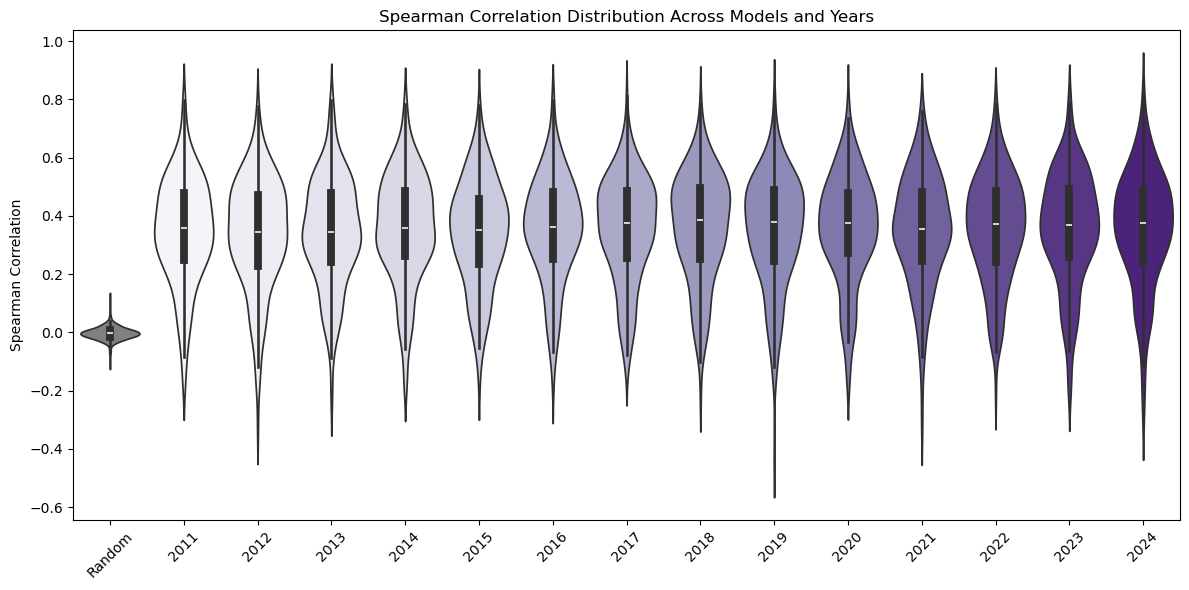

In [3]:
# Define color mapping with distinct but related colors for each year
year_colors = sns.color_palette("Purples", n_colors=14)  # Adjust the color palette as needed
color_mapping = {
    "Random": "grey",
    "Onehot": "#C5E4D2"
}
# Add yearly colors to mapping
for i, year in enumerate(range(2011, 2025)):
    color_mapping[str(year)] = year_colors[i]

# Columns to include in the melt
value_vars = ["spearman_random"]
if "spearman_onehot" in results_df.columns:
    value_vars.append("spearman_onehot")
value_vars += [f"spearman_{year}" for year in range(2011, 2025)]

# Reshape data for violin plot
melted_results = results_df.melt(
    id_vars=["filename"],
    value_vars=value_vars,
    var_name="category",
    value_name="spearman"
)

# Map to clean labels for plotting
category_mapping = {
    "spearman_random": "Random",
    "spearman_onehot": "Onehot"
}
category_mapping.update({f"spearman_{year}": str(year) for year in range(2011, 2025)})
melted_results["category"] = melted_results["category"].map(category_mapping)

# Sort the x-axis order: Random, Onehot (if present), then years
x_order = ["Random"]
if "Onehot" in melted_results["category"].unique():
    x_order.append("Onehot")
x_order += [str(year) for year in range(2011, 2025)]

# Plot the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=melted_results,
    x="category",
    y="spearman",
    order=x_order,
    palette=color_mapping
)
plt.ylabel("Spearman Correlation")
plt.xlabel("")
plt.title("Spearman Correlation Distribution Across Models and Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Read in the overall PG results so we can create a plot of all of them
# Subset the PG results to those we have in ours :D
pg_corr = pd.read_csv("DMS_substitutions_Spearman_DMS_level.csv")
results_df["DMS ID"] = results_df["filename"].str.replace(r"_with.*", "", regex=True)

combined_df = pg_corr.merge(results_df, on="DMS ID", how="inner")

#drop all non-spearman columns so we can plot
columns_to_drop = ['DMS ID', 'Number of Mutants', 'Selection Type', 'UniProt ID', 
                   'MSA_Neff_L_category', 'Taxon', 'filename']

combined_df = combined_df.drop(columns=columns_to_drop)

# Rename the columns to match the other names
combined_df = combined_df.rename(columns={
    "spearman_120M": "AMPLIFY_120M",
    "spearman_350M": "AMPLIFY_350"
})
combined_df

,Site-Independent,EVmutation,DeepSequence (single),DeepSequence (ensemble),EVE (single),EVE (ensemble),Unirep,Unirep evotuned,MSA Transformer (single),MSA Transformer (ensemble),...,spearman_2016,spearman_2017,spearman_2018,spearman_2019,spearman_2020,spearman_2021,spearman_2022,spearman_2023,spearman_2024,spearman_random
0,0.481,0.407,0.413,0.432,0.509,0.516,0.000,0.513,0.511,0.515,...,0.447004,0.482475,0.482019,0.474420,0.477779,0.473804,0.481975,0.475401,0.477581,-0.010726
1,-0.011,0.044,0.107,0.098,0.053,0.054,-0.024,0.084,0.082,0.077,...,0.069414,0.075824,0.067971,0.069081,0.041074,0.029423,0.034535,0.067528,0.060500,-0.001626
2,0.436,0.459,0.109,0.041,0.428,0.428,0.003,0.026,0.299,0.320,...,0.132965,0.189752,0.159923,0.123955,0.140783,0.125885,0.178657,0.130267,0.155848,0.020329
3,0.478,0.473,0.484,0.517,0.545,0.548,0.009,0.492,0.495,0.496,...,0.484348,0.473293,0.487243,0.496081,0.473892,0.507533,0.484702,0.501166,0.474984,0.006287
4,0.480,0.506,0.454,0.478,0.506,0.521,0.021,0.436,0.495,0.509,...,0.467496,0.473736,0.464356,0.469756,0.448703,0.478303,0.449980,0.475550,0.464835,-0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.329,0.368,0.399,0.410,0.413,0.428,0.000,0.386,0.423,0.441,...,0.176801,0.286705,0.281863,0.254446,0.185128,0.214288,0.335493,0.274664,0.228211,-0.005252
209,-0.119,0.043,0.164,0.194,0.078,0.119,0.082,0.147,0.366,0.356,...,0.204495,0.189674,0.224833,0.272864,0.185849,0.225687,-0.013976,0.065946,0.167092,-0.026770
210,0.291,0.602,0.572,0.596,0.599,0.591,-0.221,0.533,0.559,0.598,...,0.186654,-0.016705,-0.102919,-0.157329,-0.136756,0.130473,0.217779,0.159308,-0.107657,-0.008094
211,0.428,0.321,0.464,0.460,0.449,0.455,0.329,0.289,0.018,0.036,...,0.391077,0.319271,0.282132,0.292774,0.224719,0.232150,0.183314,0.180810,0.221567,-0.007703


In [5]:
column_means = combined_df.mean().sort_values(ascending=False)
sorted_columns = column_means.index.tolist()

column_medians = combined_df.median().sort_values(ascending=False)
sorted_columns = column_medians.index.tolist()



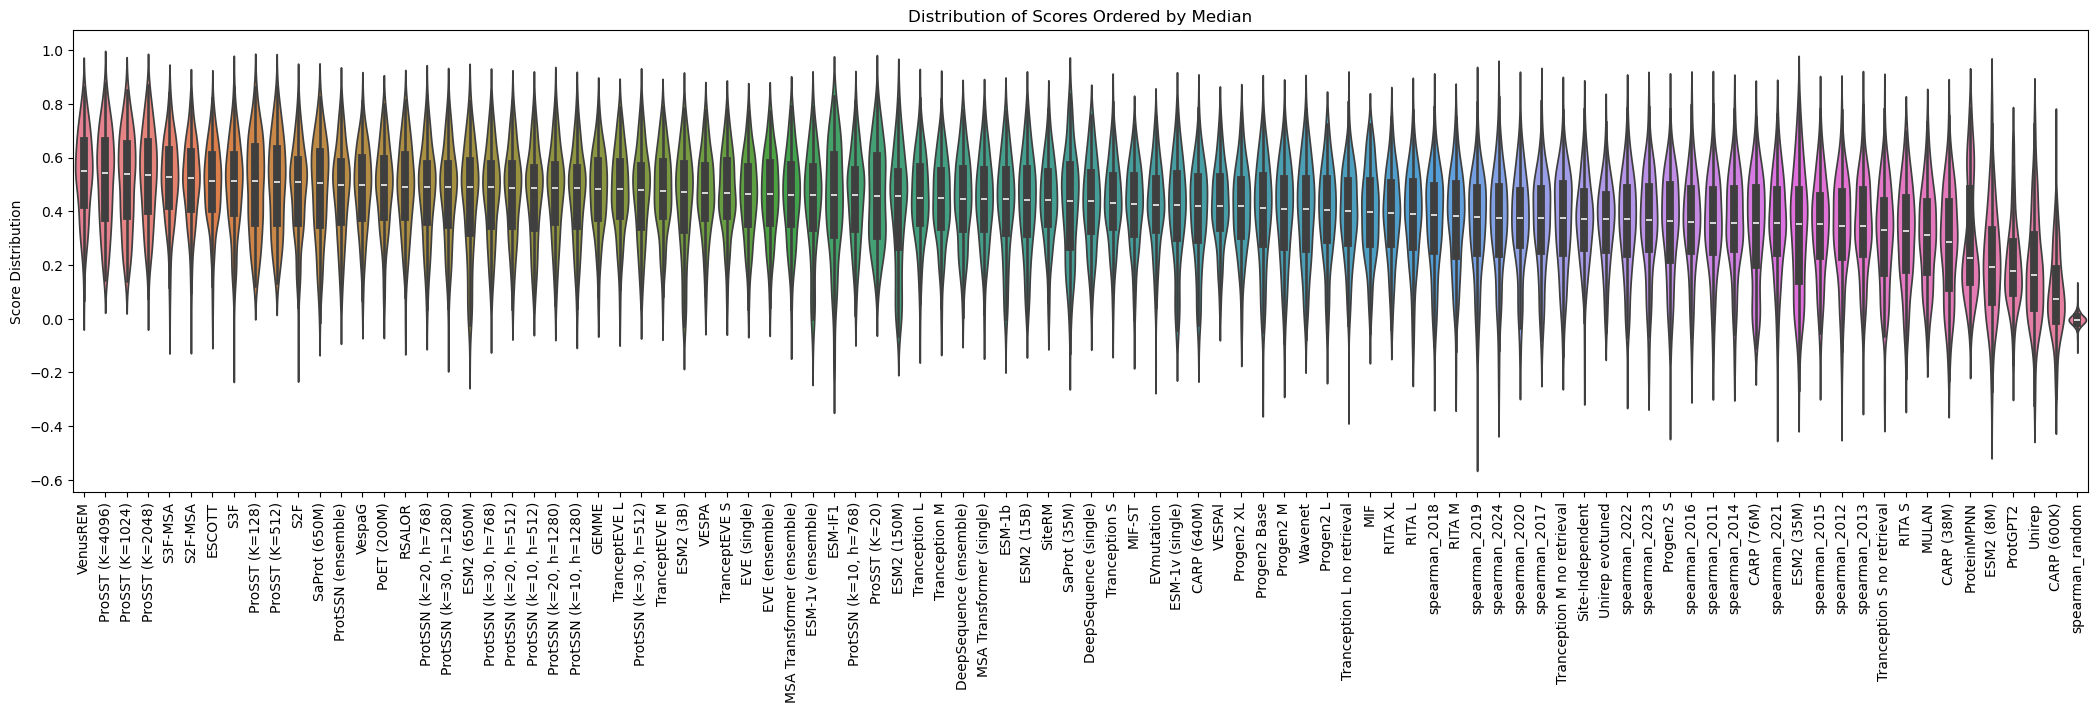

In [ ]:
# Define colors for specific labels
highlight_labels = {"AMPLIFY_120M": "red", "AMPLIFY_350": "red"}

# Create the plot
plt.figure(figsize=(26, 6))
sns.violinplot(data=combined_df[sorted_columns])

# Formatting
plt.xticks(rotation=90)  # Rotate labels for readability
plt.ylabel("Score Distribution")
plt.xlabel("")
plt.title("Distribution of Scores Ordered by Median")

# Customize tick labels
ax = plt.gca()  # Get current axis
for label in ax.get_xticklabels():
    text = label.get_text()
    if text in highlight_labels:
        label.set_color(highlight_labels[text])  # Set color
        label.set_fontweight("bold")  # Make bold

plt.show()

In [ ]:
# okay now let's plot the average spearman across years? 

base_color = "#505AAF"

# === Extract x and y ===
years = list(range(2011, 2025))
y_spearman = [results_df[f"spearman_{year}"].median() for year in years]

# === Create the plot ===
plt.figure(figsize=(6, 4))
plt.plot(years, y_spearman, 'o-', label="120M pre-trained pLLM (yearly)", color=base_color, alpha=0.9)

# === Axis formatting ===
plt.xlabel("Year of Model Training", fontsize=12, color=base_color)
plt.ylabel("Median Spearman Correlation (ProteinGym)", fontsize=12, color=base_color)
plt.title("Correlation to ProteinGym Across Years", fontsize=14, color=base_color)

# === Clean up spines and ticks ===
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors=base_color)
ax.tick_params(axis='y', colors=base_color)

# === Legend ===
plt.legend(frameon=False)

# === Save and show ===
#plt.savefig("figs/pg_correlation_by_year.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# Now also include another y axis for number of sequences in training data? or some cumulative shading...?
from matplotlib.ticker import ScalarFormatter

# === Data ===
years = list(range(2011, 2025))
y_spearman = [results_df[f"spearman_{year}"].median() for year in years]

y_proteins = [
    11659890, 15688960, 20491135, 33613080, 50371270, 72946704,
    94756963, 133853533, 172327164, 216491817, 262115656,
    297827854, 342650445, 390790959
]
y_proteins_scaled = [y / 1e8 for y in y_proteins]


base_color = "#505AAF"

# === Plot ===
fig, ax1 = plt.subplots(figsize=(6, 4))

# Left y-axis (Spearman)
ax1.plot(years, y_spearman, 'o-', label="120M pre-trained pLLM", color=base_color, alpha=0.9)
ax1.set_xlabel("Year of Model Training Data", fontsize=12, color=base_color)
ax1.set_ylabel("Median Spearman Corr across ProteinGym", fontsize=12, color=base_color)
ax1.tick_params(axis='x', colors=base_color)
ax1.tick_params(axis='y', colors=base_color)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Correlation to ProteinGym Across Years", fontsize=14, color=base_color)

# Right y-axis (Protein counts)
ax2 = ax1.twinx()
ax2.plot(years, y_proteins_scaled, 's-', label="Total Proteins (UniProt)", color='gray', alpha=0.6)
ax2.set_ylabel("Total Proteins in UniProt", fontsize=12, color='gray')
ax2.tick_params(axis='y', colors='gray')
ax2.set_ylim(.1, 4.4)

# Format ticks as scientific without offset text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
formatter.set_useOffset(False)  # <<< remove the "x10^8" from the top right
ax2.yaxis.set_major_formatter(formatter)

# Now put x10^8 into the y-label
ax2.set_ylabel(r"Total Proteins in UniProt ($\times 10^8$)", fontsize=12, color='gray')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig("figs/pg_correlation_by_year_anduniprot_data.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from matplotlib.ticker import ScalarFormatter

# === Plot ===
fig, ax1 = plt.subplots(figsize=(6, 4))

# Left y-axis (Spearman)
ax1.plot(years, y_spearman, 'o-', label="120M Pre-Trained pLLM", color=base_color, alpha=0.9)

# Add trend line (linear fit)
z = np.polyfit(years, y_spearman, 1)
p = np.poly1d(z)
ax1.plot(years, p(years), '--', color=base_color, label="pLLM Trend Line", alpha=0.3)

ax1.set_xlabel("Year of Model Training Data", fontsize=12, color=base_color)
ax1.set_ylabel("Median Spearman Corr", fontsize=12, color=base_color)
ax1.tick_params(axis='x', colors=base_color)
ax1.tick_params(axis='y', colors=base_color)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Unsupervised Corr. to ProteinGym & Training Data Size", fontsize=14, color=base_color)

# Right y-axis (Protein counts)
ax2 = ax1.twinx()
ax2.plot(years, y_proteins_scaled, 's-', label="Total Proteins (UniProt)", color='gray', alpha=0.8)
ax2.set_ylabel(r"Total Proteins in UniProt ($\times 10^8$)", fontsize=12, color='gray')
ax2.tick_params(axis='y', colors='gray')
ax2.set_ylim(.01, 4.4)

# Format ticks as scientific without offset text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
formatter.set_useOffset(False)
ax2.yaxis.set_major_formatter(formatter)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig("figs/pg_correlation_by_year_anduniprot_data_with_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Make subplots for MSA depth 
#  get rest of PG meta data to merge 
meta_df = pd.read_csv("DMS_substitutions.csv")
meta_df = meta_df[meta_df["seq_len"]<2048]
results_df["DMS_id"] = results_df["filename"].str.replace("_with_scoresandembeddings_allyears.csv", "", regex=False)
merged_df = meta_df.merge(results_df, how="inner", on = "DMS_id")
merged_df.columns

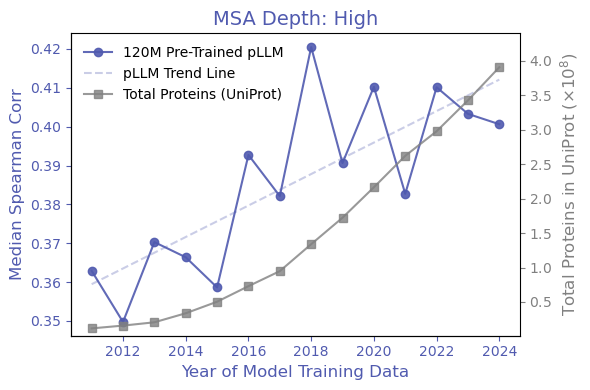

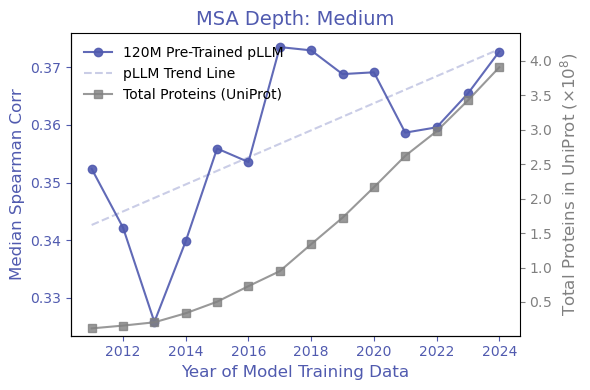

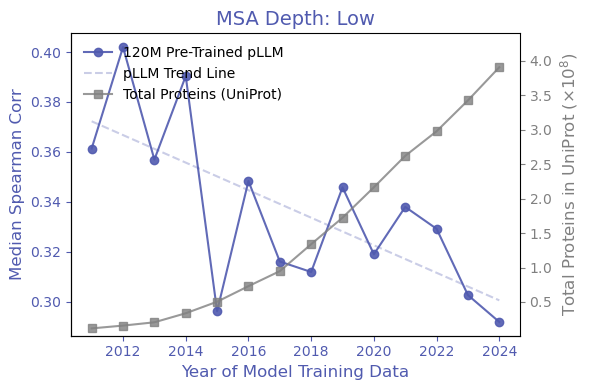

In [9]:
for category in ["High", "Medium", "Low"]:
    subset_df = merged_df[merged_df['MSA_Neff_L_category'] == category]
    # === Data ===
    y_spearman = [subset_df[f"spearman_{year}"].median() for year in years]


    # === Plot ===
    fig, ax1 = plt.subplots(figsize=(6, 4))
    
    # Left y-axis (Spearman)
    ax1.plot(years, y_spearman, 'o-', label="120M Pre-Trained pLLM", color=base_color, alpha=0.9)
    
    # Add trend line (linear fit)
    z = np.polyfit(years, y_spearman, 1)
    p = np.poly1d(z)
    ax1.plot(years, p(years), '--', color=base_color, label="pLLM Trend Line", alpha=0.3)
    
    ax1.set_xlabel("Year of Model Training Data", fontsize=12, color=base_color)
    ax1.set_ylabel("Median Spearman Corr", fontsize=12, color=base_color)
    ax1.tick_params(axis='x', colors=base_color)
    ax1.tick_params(axis='y', colors=base_color)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title(f"MSA Depth: {category}", fontsize=14, color=base_color)
    
    # Right y-axis (Protein counts)
    ax2 = ax1.twinx()
    ax2.plot(years, y_proteins_scaled, 's-', label="Total Proteins (UniProt)", color='gray', alpha=0.8)
    ax2.set_ylabel(r"Total Proteins in UniProt ($\times 10^8$)", fontsize=12, color='gray')
    ax2.tick_params(axis='y', colors='gray')
    ax2.set_ylim(.01, 4.4)
    
    # Format ticks as scientific without offset text
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    formatter.set_useOffset(False)
    ax2.yaxis.set_major_formatter(formatter)
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')
    
    plt.tight_layout()
    #plt.savefig(f"figs/pg_correlation_by_year_anduniprot_data_with_trend{category}.png", dpi=300, bbox_inches="tight")
    plt.show()

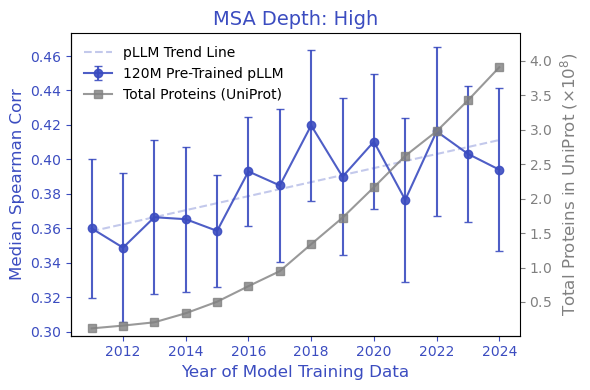

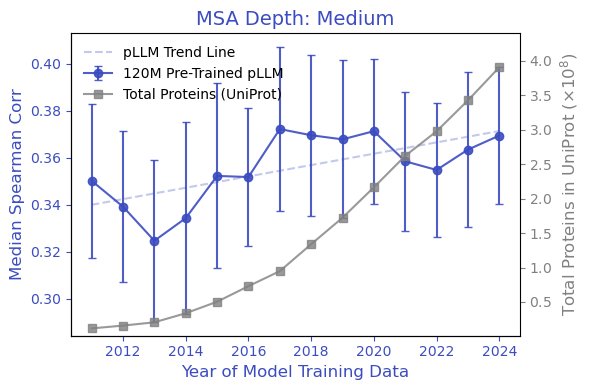

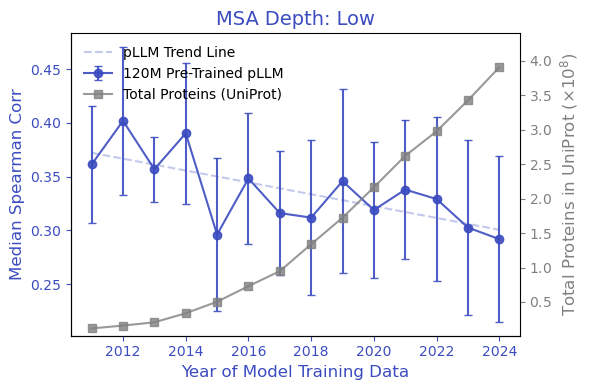

In [22]:
# Are the trends real?? 
# Bootstrap this so get a sense of error on either side of the lines

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

base_color = "#3B4CC0"
years = list(range(2011, 2025))
bootstrap_iterations = 10000
sample_size = 35

results = {}

for category in ["High", "Medium", "Low"]:
    subset_df = merged_df[merged_df['MSA_Neff_L_category'] == category]
    
    boot_medians = np.zeros((bootstrap_iterations, len(years)))

    for i in range(bootstrap_iterations):
        boot_sample = subset_df.sample(n=sample_size, replace=True)
        medians = [boot_sample[f"spearman_{year}"].median() for year in years]
        boot_medians[i] = medians

    median_vals = np.median(boot_medians, axis=0)
    # 95% confindence interval
    lower_vals = np.percentile(boot_medians, 2.5, axis=0)
    upper_vals = np.percentile(boot_medians, 97.5, axis=0)
    # st dev
    std_vals = np.std(boot_medians, axis=0)

    results[category] = {
        "median": median_vals,
        "lower": lower_vals,
        "upper": upper_vals
    }

    # === Plot ===
    fig, ax1 = plt.subplots(figsize=(6, 4))

    ax1.errorbar(
        years, median_vals,
        yerr=std_vals,
        fmt='o-', capsize=3, color=base_color,
        label="120M Pre-Trained pLLM", alpha=0.9
    )

    z = np.polyfit(years, median_vals, 1)
    p = np.poly1d(z)
    ax1.plot(years, p(years), '--', color=base_color, label="pLLM Trend Line", alpha=0.3)

    ax1.set_xlabel("Year of Model Training Data", fontsize=12, color=base_color)
    ax1.set_ylabel("Median Spearman Corr", fontsize=12, color=base_color)
    ax1.tick_params(axis='x', colors=base_color)
    ax1.tick_params(axis='y', colors=base_color)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title(f"MSA Depth: {category}", fontsize=14, color=base_color)

    ax2 = ax1.twinx()
    ax2.plot(years, y_proteins_scaled, 's-', label="Total Proteins (UniProt)", color='gray', alpha=0.8)
    ax2.set_ylabel(r"Total Proteins in UniProt ($\times 10^8$)", fontsize=12, color='gray')
    ax2.tick_params(axis='y', colors='gray')
    ax2.set_ylim(.01, 4.4)

    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    formatter.set_useOffset(False)
    ax2.yaxis.set_major_formatter(formatter)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.oh 
    plt.show()

In [19]:
# are any of these trends statistically significant?

boot_slopes = []

for i in range(bootstrap_iterations):
    boot_sample = subset_df.sample(n=sample_size, replace=True)
    medians = [boot_sample[f"spearman_{year}"].median() for year in years]
    slope, _ = np.polyfit(years, medians, 1)
    boot_slopes.append(slope)

slope_mean = np.mean(boot_slopes)
slope_ci = np.percentile(boot_slopes, [2.5, 97.5])

print(f"Bootstrapped slope mean: {slope_mean:.4f}")
print(f"95% CI for slope: {slope_ci}")

# Check for significance
# if top 97.5% is positive or if bottom 2.5% is negative 
if slope_ci[0] > 0 or slope_ci[1] < 0:
    print("Trend is statistically significant.")
else:
    print("Trend is not statistically significant.")

Bootstrapped slope mean: 0.0037
95% CI for slope: [-0.00267939  0.01090622]
Trend is not statistically significant.


In [21]:
slope_ci

array([-0.00267939,  0.01090622])